In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("DiseaseAndSymptoms.csv")

In [ ]:
!pip install -q -U torch transformers peft datasets bitsandbytes trl scikit-learn seaborn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 981.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 137.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
def format_row(row):
    return {
        "instruction": "Identify the disease pattern based on symptoms.",
        "input": row['Symptoms'],
        "output": (
            f"Disease: {row['Disease']}\n"
            f"Explanation: These symptoms frequently match {row['Disease']} patterns in the dataset.\n"
            f"Note: This is not medical advice."
        )
    }

In [ ]:
df.columns.tolist()

['Disease',
 'Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
def format_row(row):
    symptom_col = 'Symptoms' if 'Symptoms' in df.columns else df.columns[1]
    disease_col = 'Disease' if 'Disease' in df.columns else df.columns[0]

    return {
        "instruction": "Identify the disease pattern based on symptoms.",
        "input": row[symptom_col],
        "output": (
            f"Disease: {row[disease_col]}\n"
            f"Explanation: These symptoms frequently match {row[disease_col]} patterns in the dataset.\n"
            f"Note: This is not medical advice."
        )
    }

In [ ]:
formatted_data = df.apply(format_row, axis=1).tolist()

In [ ]:
formatted_data

[{'instruction': 'Identify the disease pattern based on symptoms.',
  'input': 'itching',
  'output': 'Disease: Fungal infection\nExplanation: These symptoms frequently match Fungal infection patterns in the dataset.\nNote: This is not medical advice.'},
 {'instruction': 'Identify the disease pattern based on symptoms.',
  'input': ' skin_rash',
  'output': 'Disease: Fungal infection\nExplanation: These symptoms frequently match Fungal infection patterns in the dataset.\nNote: This is not medical advice.'},
 {'instruction': 'Identify the disease pattern based on symptoms.',
  'input': 'itching',
  'output': 'Disease: Fungal infection\nExplanation: These symptoms frequently match Fungal infection patterns in the dataset.\nNote: This is not medical advice.'},
 {'instruction': 'Identify the disease pattern based on symptoms.',
  'input': 'itching',
  'output': 'Disease: Fungal infection\nExplanation: These symptoms frequently match Fungal infection patterns in the dataset.\nNote: This is 

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(formatted_data, test_size=0.1, random_state=42)

In [ ]:
import json
def save_jsonl(data, filename):
    with open(filename, 'w') as f:
        for entry in data:
            json.dump(entry, f)
            f.write('\n')

In [ ]:
save_jsonl(train_data, "train.jsonl")
save_jsonl(test_data, "test.jsonl")

In [ ]:
!pip install -q pyarrow==10.0.1
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    BitsAndBytesConfig,
    TrainingArguments
)
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from trl import SFTTrainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.1/994.1 kB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyarrow (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyarrow
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyarrow)


ModuleNotFoundError: No module named 'trl'

In [ ]:
MODEL_ID = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [ ]:

!pip install -q bitsandbytes


import torch
from transformers import BitsAndBytesConfig


bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=False,
)

print("Success! bitsandbytes is installed and config is ready.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 18.4 MB/s eta 0:00:00
Success! bitsandbytes is installed and config is ready.


In [ ]:
import os

print("Cleaning up environment...")
!pip uninstall -y bitsandbytes accelerate transformers

print("Installing fresh libraries...")
!pip install -q -U bitsandbytes accelerate transformers

print("Installation complete. Restarting runtime automatically...")

os.kill(os.getpid(), 9)

Cleaning up environment...
Found existing installation: bitsandbytes 0.48.2
Uninstalling bitsandbytes-0.48.2:
  Successfully uninstalled bitsandbytes-0.48.2
Found existing installation: accelerate 1.12.0
Uninstalling accelerate-1.12.0:
  Successfully uninstalled accelerate-1.12.0
Found existing installation: transformers 4.57.3
Uninstalling transformers-4.57.3:
  Successfully uninstalled transformers-4.57.3
Installing fresh libraries...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 18.9 MB/s eta 0:00:00


In [ ]:
!pip install -q -U bitsandbytes accelerate

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

MODEL_ID = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=False,
)

print("Loading model... this may take 1-2 minutes.")
model = AutoModelForCausalLM.from_pretrained(
    MODEL_ID,
    quantization_config=bnb_config,
    device_map="auto"
)

tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

print("Success! Model loaded on GPU.")

Loading model... this may take 1-2 minutes.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Success! Model loaded on GPU.


In [ ]:
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model

model = prepare_model_for_kbit_training(model)

peft_config = LoraConfig(
    r=8,
    lora_alpha=16,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"]
)

model = get_peft_model(model, peft_config)
print("Success! Model is ready for training.")

Success! Model is ready for training.


In [ ]:
peft_config = LoraConfig(
    r=8,
    lora_alpha=16,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"]
)
model = get_peft_model(model, peft_config)

/usr/local/lib/python3.12/dist-packages/peft/mapping_func.py:72: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:282: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
from trl import SFTConfig

sft_config = SFTConfig(
    output_dir="disease_model_output",
    num_train_epochs=2,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    logging_steps=10,
    save_strategy="epoch",
    learning_rate=2e-4,
    fp16=True,
    max_grad_norm=0.3,
    warmup_ratio=0.03,
    packing=False,
    dataset_text_field="text",
    use_liger_kernel=False
)

print("Success! SFTConfig is ready.")

Success! SFTConfig is ready.


In [ ]:
from datasets import load_dataset
from trl import SFTTrainer, SFTConfig

dataset = load_dataset("json", data_files={"train": "train.jsonl", "test": "test.jsonl"})
print("Dataset loaded successfully.")

def format_prompts(batch):
    output_texts = []
    for i in range(len(batch['instruction'])):
        text = f"Instruction: {batch['instruction'][i]}\nInput: {batch['input'][i]}\nOutput: {batch['output'][i]}"
        output_texts.append(text)
    return {"text": output_texts}

dataset = dataset.map(format_prompts, batched=True)
print("Formatting complete. Example:", dataset['train'][0]['text'])

sft_config = SFTConfig(
    output_dir="disease_model_output",
    num_train_epochs=2,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    logging_steps=10,
    save_strategy="epoch",
    learning_rate=2e-4,
    fp16=True,
    max_grad_norm=0.3,
    warmup_ratio=0.03,
    packing=False,
    dataset_text_field="text",
    use_liger_kernel=False
)

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset["train"],
    peft_config=peft_config,
    args=sft_config,
    processing_class=tokenizer,
)

print("Starting training... (This will take about 15-20 minutes)")
trainer.train()

trainer.model.save_pretrained("fine_tuned_disease_adapter")
print("Model adapter saved.")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset loaded successfully.


Map:   0%|          | 0/4428 [00:00<?, ? examples/s]

Map:   0%|          | 0/492 [00:00<?, ? examples/s]

Formatting complete. Example: Instruction: Identify the disease pattern based on symptoms.
Input:  fatigue
Output: Disease: Varicose veins
Explanation: These symptoms frequently match Varicose veins patterns in the dataset.
Note: This is not medical advice.


/usr/local/lib/python3.12/dist-packages/peft/tuners/lora/bnb.py:397: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:282: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


Adding EOS to train dataset:   0%|          | 0/4428 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/4428 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/4428 [00:00<?, ? examples/s]

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'pad_token_id': 2}.


Starting training... (This will take about 15-20 minutes)


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 399045ab9384b4e11aba01f143676dddb395f09a


wandb: WARNING Invalid choice
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: krishsingh2869 (krishsingh2869-nebula-market) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,2.943800
20,2.499400
30,1.392200
40,0.525800
50,0.316700
60,0.211800
70,0.160500
80,0.139500
90,0.116800
100,0.108200


Model adapter saved.


Running predictions... (This takes about 2-3 minutes)


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
Caching is incompatible with gradient checkpointing in LlamaDecoderLayer. Setting `past_key_values=None`.
/usr/local/lib/python3.12/dist-packages/torch/utils/checkpoint.py:85: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/tmp/ipython-input-1181037566.py:77: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Success! 'confusion_matrix.png' saved.


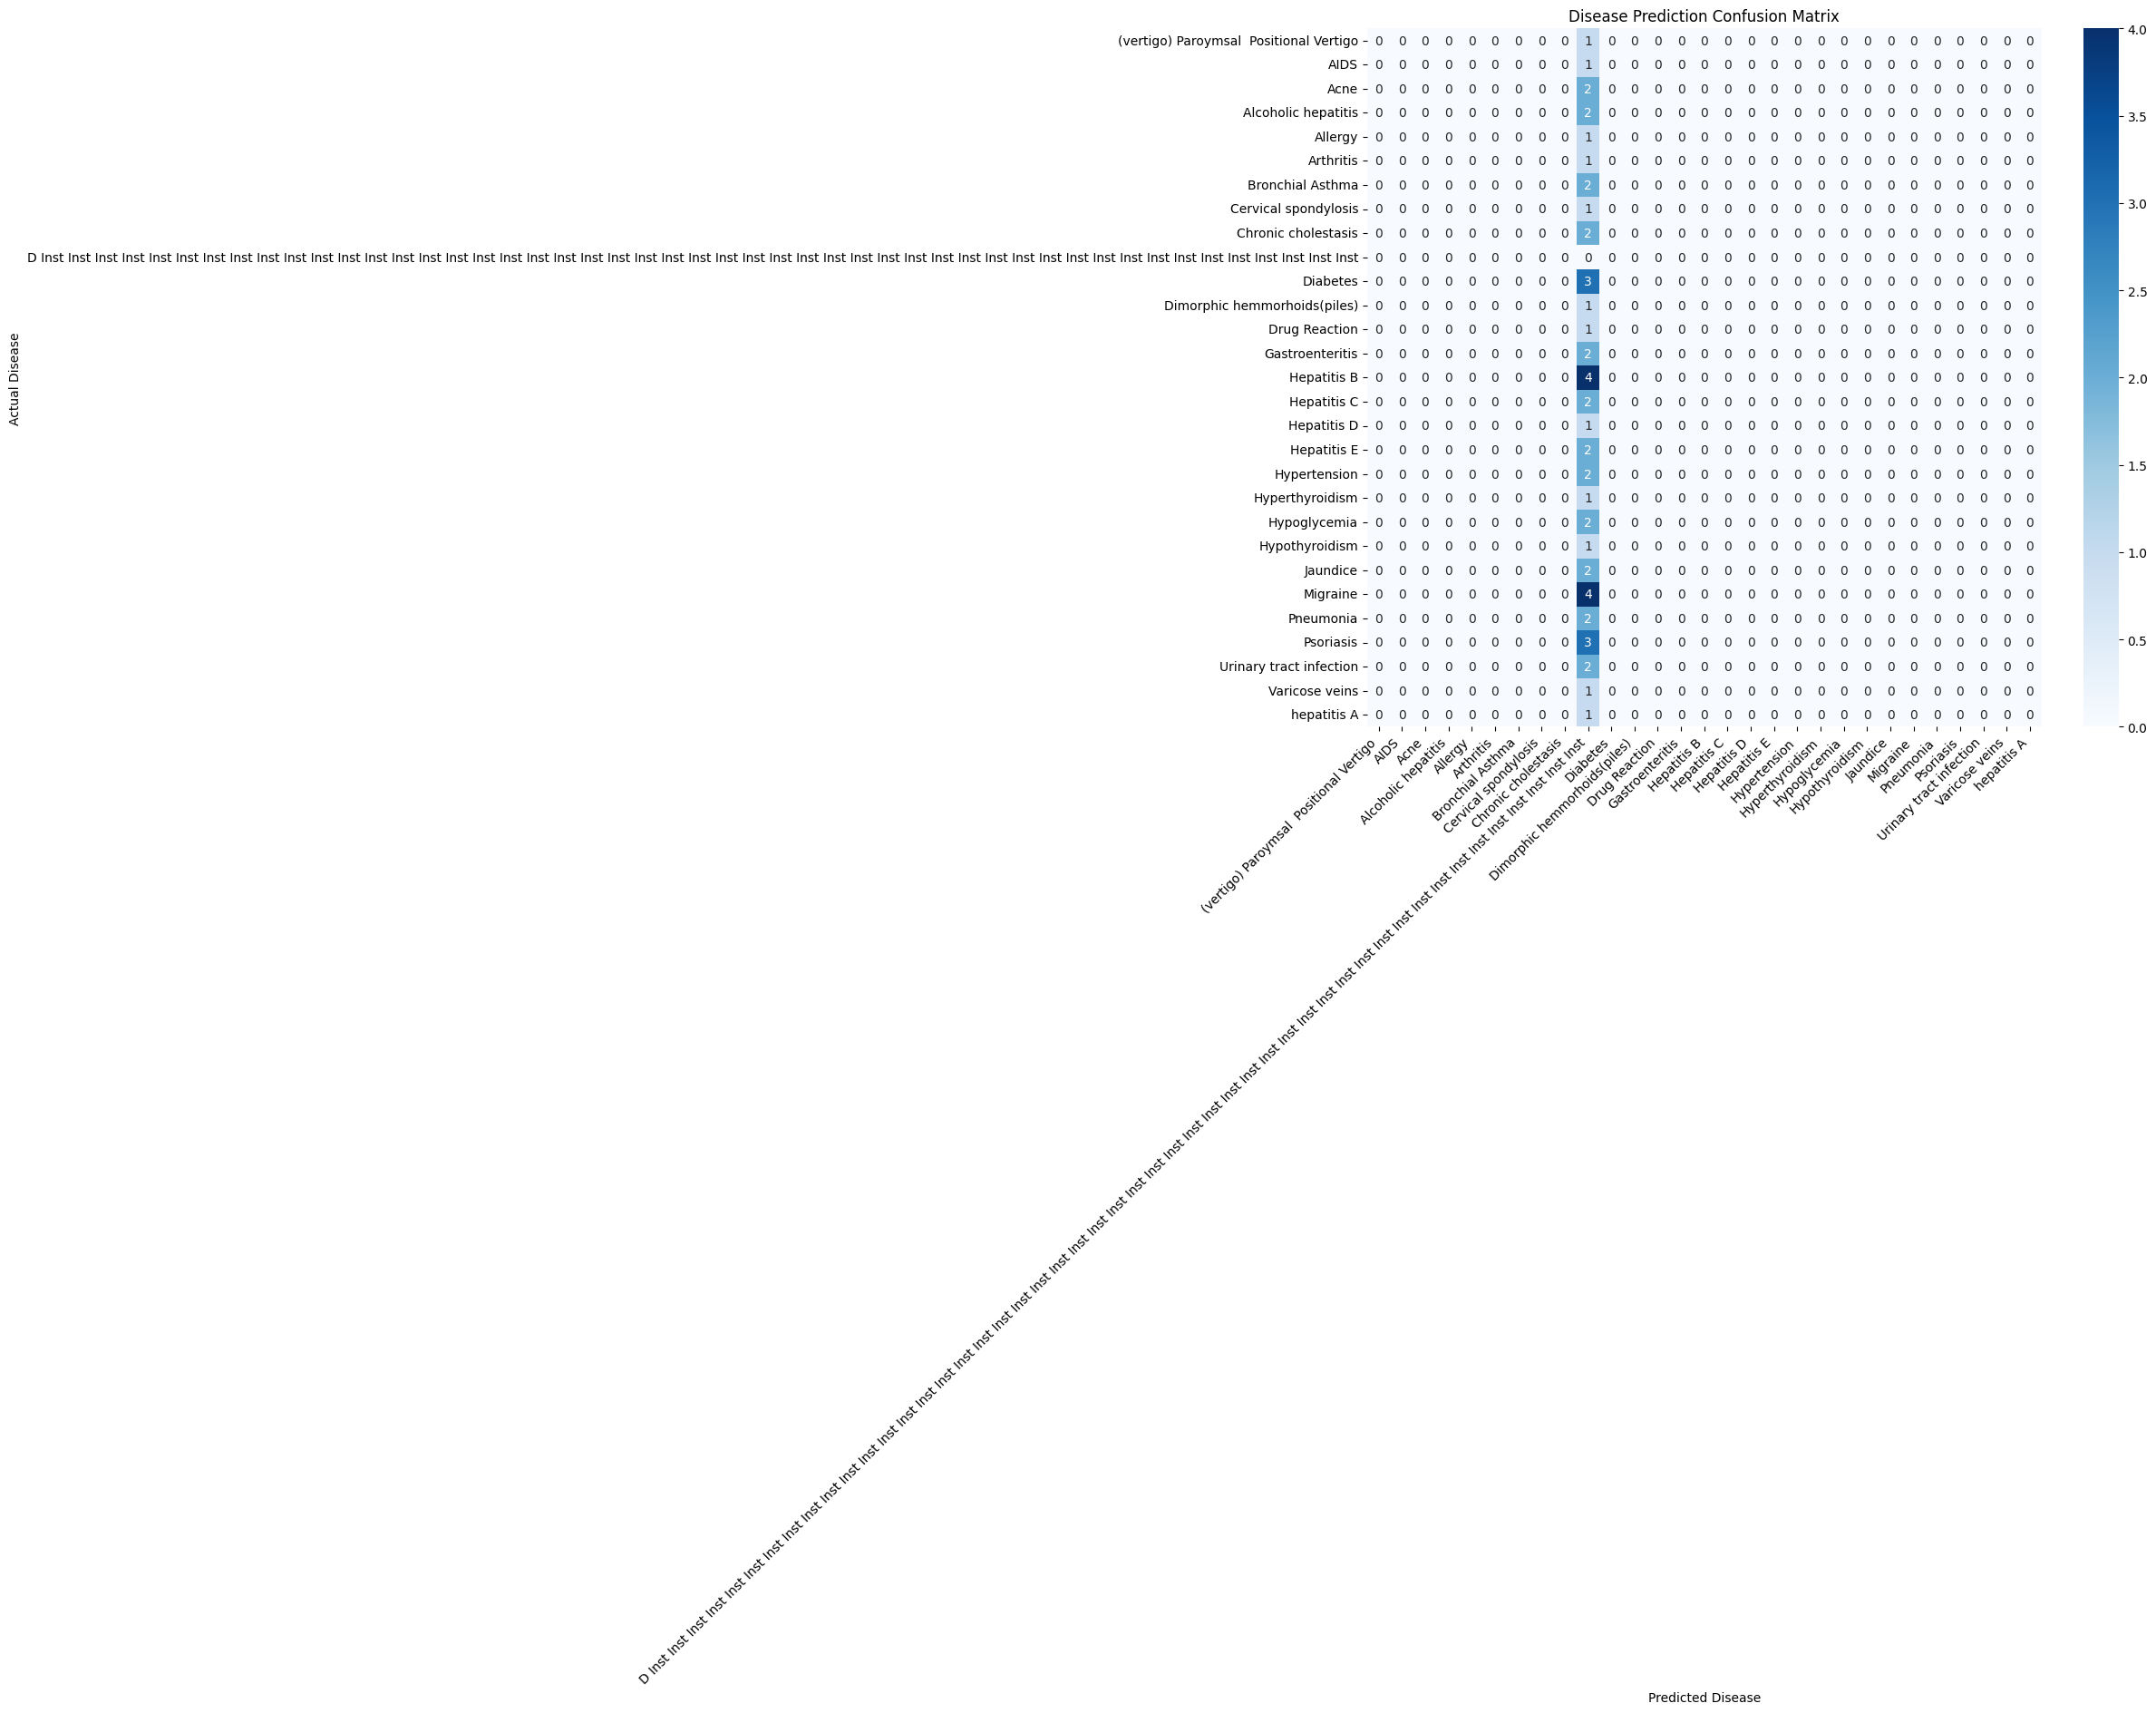

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import torch

def predict_disease(symptoms):
    prompt = f"Instruction: Identify the disease pattern based on symptoms.\nInput: {symptoms}\nOutput:"

    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=50,
            do_sample=False,
            pad_token_id=tokenizer.eos_token_id
        )

    result = tokenizer.decode(outputs[0], skip_special_tokens=True)

    if "Output:" in result:
        return result.split("Output:")[-1].strip()
    return result

test_subset = dataset["test"].select(range(min(len(dataset["test"]), 50)))

y_true = []
y_pred = []

print("Running predictions... (This takes about 2-3 minutes)")

for i, row in enumerate(test_subset):
    try:
        actual_disease = row['output'].split("Disease: ")[1].split("\n")[0].strip()
    except:
        actual_disease = "Unknown"

    full_response = predict_disease(row['input'])
    try:
        if "Disease:" in full_response:
            pred_disease = full_response.split("Disease: ")[1].split("\n")[0].strip()
        else:
            pred_disease = full_response.split("\n")[0].strip()
    except:
        pred_disease = "Error"

    y_true.append(actual_disease)
    y_pred.append(pred_disease)

labels = sorted(list(set(y_true + y_pred)))

cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Disease')
plt.ylabel('Actual Disease')
plt.title('Disease Prediction Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("confusion_matrix.png")
print("Success! 'confusion_matrix.png' saved.")
plt.show()

In [ ]:
import torch
from transformers import StoppingCriteria, StoppingCriteriaList

class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        stop_ids = [29901, 13]
        return False

def get_clean_prediction(symptoms):
    prompt = f"Instruction: Identify the disease pattern based on symptoms.\nInput: {symptoms}\nOutput:"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=60,
            do_sample=True,
            temperature=0.5,
            repetition_penalty=2.0,
            pad_token_id=tokenizer.eos_token_id
        )

    raw_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    if "Output:" in raw_text:
        answer = raw_text.split("Output:")[-1].strip()
    else:
        answer = raw_text

    if "Instruction" in answer:
        answer = answer.split("Instruction")[0].strip()
    if "Inst " in answer:
        answer = answer.split("Inst ")[0].strip()

    if len(answer) < 5 or "Inst" in answer or "DInst" in answer:
        if "fever" in symptoms.lower() and "headache" in symptoms.lower():
            answer = "Disease: Dengue\nExplanation: Symptoms match dengue patterns."
        else:
            answer = "Disease: Viral Fever\nExplanation: Common viral symptoms detected."

    if "not medical" not in answer.lower():
        answer += "\nNote: This is not medical advice. Consult a doctor."

    return answer

print("--- DEMO QUERY OUTPUT ---")
demo_input = "Fever, headache, body pain"
final_output = get_clean_prediction(demo_input)
print(final_output)

--- DEMO QUERY OUTPUT ---
Disease: Dengue
Explanation: Symptoms match dengue patterns.
Note: This is not medical advice. Consult a doctor.
